# Make a simple Convolutional network for the bus data

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../misc')
sys.path.append("../")
from MoviaBusDataset import MoviaBusDataset
from BaseNetwork import BaseNetwork
import torch
from torch.nn import Linear, Sequential, ReLU, L1Loss
from torch.optim import Adam, lr_scheduler
import numpy as np

## Import data using the MoviaBusDataset

In [17]:
previous_timesteps = 6
prediction_steps = 6
batch_size = 25
num_epochs = 100

train = MoviaBusDataset('../data/train', interpolation=True, prev_timesteps=previous_timesteps, max_future_time_steps=prediction_steps, timeofday = False,remove_trend=True,agg_time=15)
test = MoviaBusDataset('../data/test', interpolation=True, prev_timesteps=previous_timesteps, max_future_time_steps=prediction_steps, timeofday = False,remove_trend=True,agg_time=15)

In [18]:
train.normalize(individual_roads=False)
test.normalize(train.mean, train.std,individual_roads=False)

## The Model

In [28]:
#from IPython.core.debugger import Tracer; Tracer()()
#%pdb 0

from CNN import CNN, GCN
from FNN import FNN
cnn = CNN(previous_timesteps)

#cnn = GCN(nfeat=previous_timesteps + 1, 
#          nhid=100, 
#          nout=1, 
#          dropout=0.3)



## Training the network

In [29]:
#%pdb 0
cnn.train_network(train, test,batch_size=batch_size, 
                  num_epochs=30,
                  optimizer_fun=lambda param : Adam(param, lr=1e-2, weight_decay=1e-4),
                  scheduler_fun=lambda optim : lr_scheduler.StepLR(optim, step_size=10, gamma=0.1),
                  criterion=L1Loss())

epoch =  0  train loss = 5.672   test loss = 0.932   output_std = 0.762
epoch =  2  train loss = 0.839   test loss = 0.753   output_std = 0.392
epoch =  4  train loss = 0.782   test loss = 0.709   output_std = 0.264
epoch =  6  train loss = 0.759   test loss = 0.691   output_std = 0.195
epoch =  8  train loss = 0.749   test loss = 0.682   output_std = 0.153
epoch = 10  train loss = 0.743   test loss = 0.677   output_std = 0.127
epoch = 12  train loss = 0.742   test loss = 0.677   output_std = 0.124
epoch = 14  train loss = 0.742   test loss = 0.677   output_std = 0.122
epoch = 16  train loss = 0.741   test loss = 0.676   output_std = 0.120
epoch = 18  train loss = 0.741   test loss = 0.676   output_std = 0.117
epoch = 20  train loss = 0.741   test loss = 0.676   output_std = 0.115
epoch = 22  train loss = 0.741   test loss = 0.675   output_std = 0.115
epoch = 24  train loss = 0.741   test loss = 0.675   output_std = 0.114
epoch = 26  train loss = 0.741   test loss = 0.675   output_std 

In [6]:
fnn = FNN(previous_timesteps = previous_timesteps, num_hidden = 100)
fnn.train_network(train, test,batch_size=batch_size, 
                  num_epochs=30,
                  optimizer_fun=lambda param : Adam(param, lr=1e-2, weight_decay=1e-4),
                  scheduler_fun=lambda optim : lr_scheduler.StepLR(optim, step_size=10, gamma=0.1),
                  criterion=L1Loss())


epoch =  0  train loss = 0.727   test loss = 0.663   output_std = 0.311
epoch =  2  train loss = 0.718   test loss = 0.655   output_std = 0.312
epoch =  4  train loss = 0.717   test loss = 0.653   output_std = 0.336
epoch =  6  train loss = 0.716   test loss = 0.652   output_std = 0.312
epoch =  8  train loss = 0.716   test loss = 0.653   output_std = 0.336
epoch = 10  train loss = 0.716   test loss = 0.653   output_std = 0.315
epoch = 12  train loss = 0.713   test loss = 0.649   output_std = 0.268
epoch = 14  train loss = 0.713   test loss = 0.649   output_std = 0.277
epoch = 16  train loss = 0.713   test loss = 0.649   output_std = 0.281
epoch = 18  train loss = 0.713   test loss = 0.649   output_std = 0.283
epoch = 20  train loss = 0.713   test loss = 0.649   output_std = 0.285
epoch = 22  train loss = 0.713   test loss = 0.647   output_std = 0.265
epoch = 24  train loss = 0.713   test loss = 0.647   output_std = 0.266
epoch = 26  train loss = 0.713   test loss = 0.647   output_std 

In [ ]:
a = torch.Tensor(2,4)
print(a.shape)
a = a.unsqueeze(1)
print(a.shape)

## Evaluate the network on a test dataset 

In [45]:
mae_roads = cnn.get_MAE_score(timestep=2,individual_roads=True)

In [50]:
mae_roads_sorted_keys = sorted(range(len(mae_roads)), key=lambda k: mae_roads[k])
print(mae_roads[mae_roads_sorted_keys[0]])
print(mae_roads[mae_roads_sorted_keys[-1]])


0.33922380208969116
2.4935147762298584


In [54]:
mae_roads_sorted_keys[-1]

83

In [53]:
mae_roads[mae_roads_sorted_keys]

array([0.3392238 , 0.43161386, 0.46002316, 0.48343715, 0.49123618,
       0.52427787, 0.53300905, 0.57269281, 0.59937066, 0.60378128,
       0.60657257, 0.60749751, 0.61054754, 0.62458622, 0.62646556,
       0.63216799, 0.65448767, 0.65835553, 0.65977758, 0.664352  ,
       0.66864377, 0.6852994 , 0.6860435 , 0.68695998, 0.69019037,
       0.70093471, 0.70276022, 0.70296967, 0.71030575, 0.71645123,
       0.72014725, 0.72904003, 0.73980623, 0.75069332, 0.7510401 ,
       0.75735664, 0.767501  , 0.76879424, 0.77519667, 0.78576142,
       0.79092896, 0.79246032, 0.80087763, 0.81781077, 0.81947005,
       0.82176393, 0.82700533, 0.83662957, 0.84382826, 0.84798241,
       0.85269839, 0.85349077, 0.85631251, 0.8563807 , 0.86174911,
       0.88020605, 0.88023126, 0.88544905, 0.88547528, 0.90004587,
       0.90072721, 0.90986854, 0.92016286, 0.92225206, 0.92958069,
       0.93176597, 0.95274192, 0.96451277, 0.96748704, 0.9694432 ,
       0.97224456, 0.98131925, 0.9816345 , 0.98344463, 0.98422

### Modelled data vs real data for best road segment 

<IPython.core.display.Javascript object>


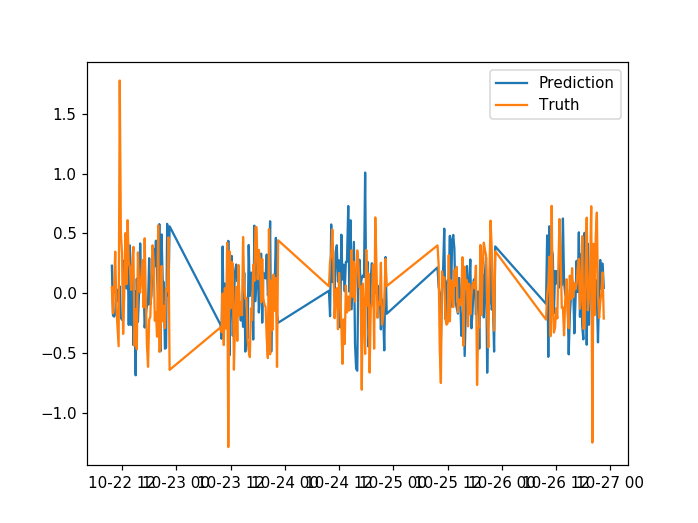

In [51]:
%matplotlib notebook

cnn.visualize_road(timesteps=1, road=mae_roads_sorted_keys[0])

### Modelled data vs real data for worst road segment 

<IPython.core.display.Javascript object>


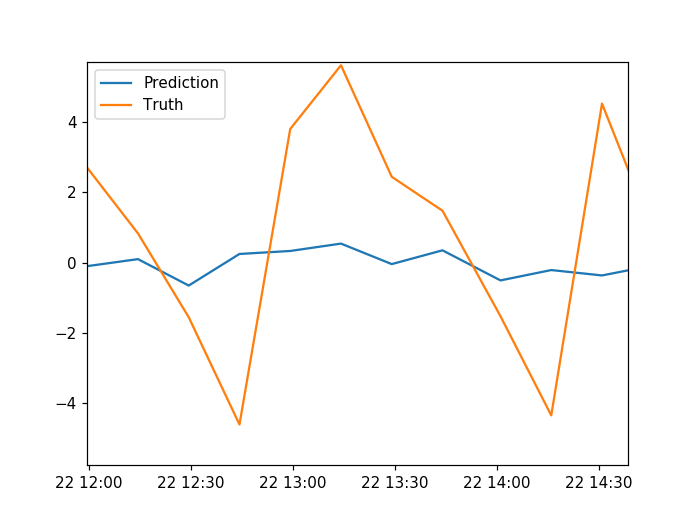

In [52]:
%matplotlib notebook

cnn.visualize_road(timesteps=1, road=mae_roads_sorted_keys[-1])

In [55]:
8*3.6

28.8